In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/Weather Station Locations.csv')

In [ ]:
print(df.head())
df.columns

    WBAN            NAME STATE/COUNTRY ID    LAT     LON  ELEV   Latitude  \
0  33013          AIN EL               AL  3623N  00637E   611  36.383333   
1  33031        LA SENIA               AL  3537N  00037E    88  35.616667   
2  33023  MAISON BLANCHE               AL  3643N  00314E    23  36.716667   
3  33044        TELERGMA               AL  3607N  00621E   754  36.116667   
4  12001         TINDOUF               AL  2741N  00809W   443  27.683333   

   Longitude  
0   6.650000  
1   0.583333  
2   3.216667  
3   6.416667  
4  -8.083333  


Index(['WBAN', 'NAME', 'STATE/COUNTRY ID', 'LAT', 'LON', 'ELEV', 'Latitude',
       'Longitude'],
      dtype='object')

In [ ]:
col_to_drop = ['WBAN', 'NAME', 'LAT', 'LON']
df = df.drop(col_to_drop, axis=1)
print(df.head())

  STATE/COUNTRY ID  ELEV   Latitude  Longitude
0               AL   611  36.383333   6.650000
1               AL    88  35.616667   0.583333
2               AL    23  36.716667   3.216667
3               AL   754  36.116667   6.416667
4               AL   443  27.683333  -8.083333


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATE/COUNTRY ID  161 non-null    object 
 1   ELEV              161 non-null    int64  
 2   Latitude          161 non-null    float64
 3   Longitude         161 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.2+ KB


In [ ]:
x = df[['ELEV', 'Latitude', 'Longitude']]
y = df['STATE/COUNTRY ID']

df = pd.DataFrame(df)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['STATE/COUNTRY ID'] = label_encoder.fit_transform(df['STATE/COUNTRY ID'])
country_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

print("Mapping of encoded values to original country names:")
for encoded, country in country_mapping.items():
    print(f"{encoded} -> {country}")

Mapping of encoded values to original country names:
0 -> AL
1 -> AT
2 -> AU
3 -> AZ
4 -> BA
5 -> BE
6 -> BN
7 -> BR
8 -> BZ
9 -> CS
10 -> CT
11 -> CU
12 -> DR
13 -> DY
14 -> EG
15 -> EQ
16 -> ER
17 -> ET
18 -> FJ
19 -> FR
20 -> GH
21 -> GL
22 -> GR
23 -> GU
24 -> GY
25 -> HA
26 -> HI
27 -> IL
28 -> IN
29 -> IQ
30 -> IR
31 -> IY
32 -> JM
33 -> JP
34 -> KO
35 -> KU
36 -> LC
37 -> LI
38 -> LY
39 -> MC
40 -> MT
41 -> NG
42 -> NH
43 -> NI
44 -> NK
45 -> NU
46 -> NZ
47 -> OM
48 -> PF
49 -> PH
50 -> PI
51 -> PK
52 -> PM
53 -> PQ
54 -> PR
55 -> SG
56 -> SO
57 -> SP
58 -> TD
59 -> TI
60 -> TO
61 -> TS
62 -> TU
63 -> UK


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATE/COUNTRY ID  161 non-null    int64  
 1   ELEV              161 non-null    int64  
 2   Latitude          161 non-null    float64
 3   Longitude         161 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 5.2 KB


In [ ]:
x = df[['ELEV', 'Latitude', 'Longitude']]
y = df['STATE/COUNTRY ID']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred

array([30.79897218, 29.90769334, 30.25468602, 28.06393687, 34.06316666,
       29.82256607, 30.93551118, 33.19473101, 32.46129312, 27.18598058,
       24.02312399, 30.54223677, 22.68898729, 28.44620444, 28.2869694 ,
       32.48885618, 34.05829038, 28.31790232, 31.30221448, 31.05315186,
       24.12446468, 23.91254276, 30.92286958, 24.12696024, 27.73502366,
       30.47574841, 30.5192279 , 28.10672044, 32.44826756, 26.36582145,
       29.95477497, 28.8757763 , 31.54924953])

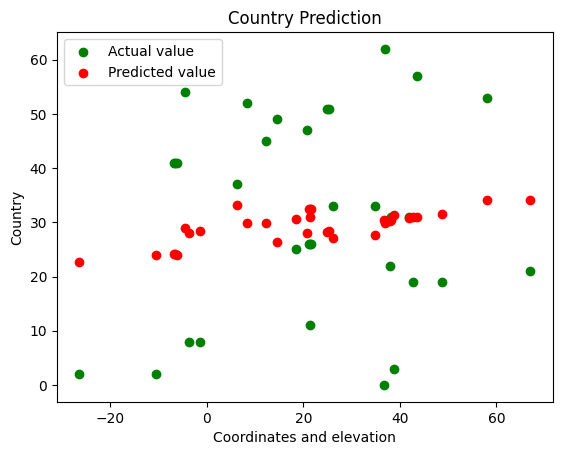

In [ ]:
plt.scatter(x_test.iloc[:,1], y_test, color='green', label='Actual value')
plt.scatter(x_test.iloc[:,1], y_pred, color='red', label='Predicted value')
plt.xlabel('Coordinates and elevation')
plt.ylabel('Country')
plt.title('Country Prediction')
plt.legend()
plt.show()

In [ ]:
model.predict([[187,-23.45,144.0666667]])

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 327.21954350918963
R^2 Score: -0.030808010834810773


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
